In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))
    def conv_test(image):
        self.conv1(image)

lr = 0.1

Directly konverted to torch.tensor:  torch.Size([128, 128, 4]) <class 'torch.Tensor'>
Choosed one channel:  torch.Size([128, 128]) <class 'torch.Tensor'>
After reshape:  torch.Size([128, 128]) <class 'torch.Tensor'>
Data type:  torch.uint8
Convolution output:  torch.Size([1, 16, 64, 64])


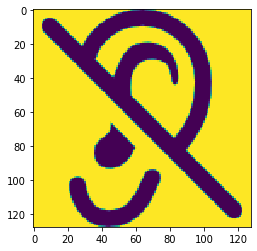

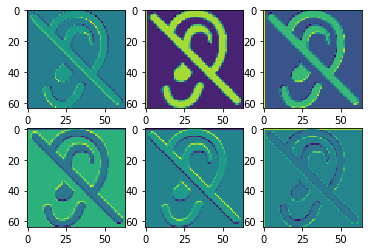

In [6]:
from skimage import io, transform
from matplotlib import pyplot

image = io.imread('sound.png')
image = torch.tensor(image)
print("Directly konverted to torch.tensor: " , image.shape, type(image))

# Image hase 4 channels  (donno why - RGB+"X" ?? )
# i choose only 1 channel 
image = image[:,:,0]         

pyplot.imshow(image)

print("Choosed one channel: " , image.shape, type(image))

# Plots one channel of 
pyplot.figure(1)
pyplot.imshow(image)

# Conv needs 4 arguments (4 dimentional tensor)
# View is tensor reshape (as reshape in numpy)
image_pro = image.view(-1, 1, 128, 128)

print("After reshape: " , image.shape, type(image))
print("Data type: ", image.dtype)

# Conversion to float needed
image_pro = image_pro.float()

# Define convolution
convT = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
# Convolution input 
Cj2 = convT(image_pro)

print("Convolution output: ", Cj2.shape)

# We can't view the object that requires_gradient = True 
Cj2 = Cj2.detach()

# Convolutions plot (6 from 16)
pyplot.figure(2)
channel = 16
for i in range(0,6):
    pyplot.subplot(2,3,i+1)
    pyplot.imshow(Cj2[0,i])